In [1]:
import numpy as np
from scipy.optimize import curve_fit

def Limb_model(x,a1,a2,a3):
    limb = 1. - a1*(1-x) - a2*(1-x**1.5) - a3*(1-x**2)

    return limb

def Teff1(intensity,wave,mu_indx):
    # should probably shift more stuff into subroutines
    """
    Input: 
    intensity='meanint'
    wave='w'
    mu_indx=[0,2,4,6,8]

    Output: 
    effective temperature 
    """
    cl=2.9979e+08                   # speed of light in SI units
    sig=5.67e-08                    # Stefan-Boltzmann in SI units
    pi=2*np.arccos(0)

    muext = np.arange(21)/20   # mu-grid for final integration, 
                               # assumption: input mu is [.2,.3,..,.9,1]

    nw=intensity.shape[1]
    # should have check here that nw is indeed wave.size
    nmu=intensity.shape[0]
    mu=0.2+np.arange(nmu)/10

    imu=mu_indx.size        # not all mu values are filled, only imu of them
    bolint=np.zeros(imu)
    # integrate to get bolometric intensities
    wv=1e-09*wave
    for i in range(0,imu): 
        j = mu_indx[i]
        intw=(0.001*cl/wv**2)*np.reshape(intensity[j,:],nw)
        bolint[i]=np.trapz(intw,wv)


    # normalise and fit
    # y = bolint/bolint(imu-1)
    np.savetxt('bolints',bolint)
    init_vals = [1, 1, 0.5]
    best_vals, covar = curve_fit(Limb_model,mu[mu_indx],bolint/bolint[imu-1], p0=init_vals)
    np.savetxt('fitvals',best_vals)
    # evaluate fitted bolometric intensities on new mugrid
    boliext = Limb_model(muext,best_vals[0],best_vals[1],best_vals[2])
    flx = bolint[imu-1]*np.trapz(boliext*muext,muext)
    Teff1 = (2*pi*flx/sig)**0.25

    return Teff1

In [11]:
import glob

w = np.loadtxt('../runs/mpsa.wave')

Nw = len(w)

mu_indx = np.array([0, 2, 4, 6, 8])

mh0_hyd_mean = glob.glob('./1D_mean/mh0-hyd_*')
mh1_hyd_mean = glob.glob('./1D_mean/mh1-hyd_*')
mh0_ssd_mean = glob.glob('./1D_mean/mh0-ssd_*')
mh1_ssd_mean = glob.glob('./1D_mean/mh1-ssd_*')
mh0_300_mean = glob.glob('./1D_mean/mh0-300_*')
mh1_300_mean = glob.glob('./1D_mean/mh1-300_*')

I0m0_mean = np.zeros((9, Nw))
I0m1_mean = np.zeros((9, Nw))
ISm0_mean = np.zeros((9, Nw))
ISm1_mean = np.zeros((9, Nw))
I3m0_mean = np.zeros((9, Nw))
I3m1_mean = np.zeros((9, Nw))

for f in mh0_hyd_mean: I0m0_mean += np.load(f)['I']
for f in mh1_hyd_mean: I0m1_mean += np.load(f)['I']
for f in mh0_ssd_mean: ISm0_mean += np.load(f)['I']
for f in mh1_ssd_mean: ISm1_mean += np.load(f)['I']
for f in mh0_300_mean: I3m0_mean += np.load(f)['I']
for f in mh1_300_mean: I3m1_mean += np.load(f)['I']
    
I0m0_mean /= len(mh0_hyd_mean)
I0m1_mean /= len(mh1_hyd_mean)
ISm0_mean /= len(mh0_ssd_mean)
ISm1_mean /= len(mh1_ssd_mean)

In [20]:
T0m0_mean = Teff1(I0m0_mean, w, mu_indx)
T0m1_mean = Teff1(I0m1_mean, w, mu_indx)

TSm0_mean = Teff1(ISm0_mean, w, mu_indx)
TSm1_mean = Teff1(ISm1_mean, w, mu_indx)

T3m0_mean = Teff1(I3m0_mean, w, mu_indx)
T3m1_mean = Teff1(I3m1_mean, w, mu_indx)

In [21]:
print('hydro, [Fe / H] = 0: ',  T0m0_mean)
print('hydro, [Fe / H] = -1: ', T0m1_mean)

print('ssd, [Fe / H] = 0: ',  TSm0_mean)
print('ssd, [Fe / H] = -1: ', TSm1_mean)

print('300G, [Fe / H] = 0: ',  T3m0_mean)
print('300G, [Fe / H] = -1: ', T3m1_mean)

hydro, [Fe / H] = 0:  5531.495213458087
hydro, [Fe / H] = -1:  5522.693954625227
ssd, [Fe / H] = 0:  5552.196381995606
ssd, [Fe / H] = -1:  5525.545221273979
300G, [Fe / H] = 0:  5601.920765845529
300G, [Fe / H] = -1:  5710.300043642289


In [22]:
mh0_hyd_medi = glob.glob('./1D_median/mh0-hyd_*')
mh1_hyd_medi = glob.glob('./1D_median/mh1-hyd_*')
mh0_ssd_medi = glob.glob('./1D_median/mh0-ssd_*')
mh1_ssd_medi = glob.glob('./1D_median/mh1-ssd_*')
mh0_300_medi = glob.glob('./1D_median/mh0-300_*')
mh1_300_medi = glob.glob('./1D_median/mh1-300_*')

I0m0_medi = np.zeros((9, Nw))
I0m1_medi = np.zeros((9, Nw))
ISm0_medi = np.zeros((9, Nw))
ISm1_medi = np.zeros((9, Nw))
I3m0_medi = np.zeros((9, Nw))
I3m1_medi = np.zeros((9, Nw))

for f in mh0_hyd_medi: I0m0_medi += np.load(f)['I']
for f in mh1_hyd_medi: I0m1_medi += np.load(f)['I']
for f in mh0_ssd_medi: ISm0_medi += np.load(f)['I']
for f in mh1_ssd_medi: ISm1_medi += np.load(f)['I']
for f in mh0_300_medi: I3m0_medi += np.load(f)['I']
for f in mh1_300_medi: I3m1_medi += np.load(f)['I']
    
I0m0_medi /= len(mh0_hyd_medi)
I0m1_medi /= len(mh1_hyd_medi)
ISm0_medi /= len(mh0_ssd_medi)
ISm1_medi /= len(mh1_ssd_medi)

In [23]:
T0m0_medi = Teff1(I0m0_medi, w, mu_indx)
T0m1_medi = Teff1(I0m1_medi, w, mu_indx)

TSm0_medi = Teff1(ISm0_medi, w, mu_indx)
TSm1_medi = Teff1(ISm1_medi, w, mu_indx)

T3m0_medi = Teff1(I3m0_medi, w, mu_indx)
T3m1_medi = Teff1(I3m1_medi, w, mu_indx)

In [24]:
print('hydro, [Fe / H] = 0: ',  T0m0_medi)
print('hydro, [Fe / H] = -1: ', T0m1_medi)

print('ssd, [Fe / H] = 0: ',  TSm0_medi)
print('ssd, [Fe / H] = -1: ', TSm1_medi)

print('300G, [Fe / H] = 0: ',  T3m0_medi)
print('300G, [Fe / H] = -1: ', T3m1_medi)

hydro, [Fe / H] = 0:  5515.45610272446
hydro, [Fe / H] = -1:  5490.439958818361
ssd, [Fe / H] = 0:  5533.4958688583665
ssd, [Fe / H] = -1:  5493.93435242986
300G, [Fe / H] = 0:  5562.037875371054
300G, [Fe / H] = -1:  5514.370244822776


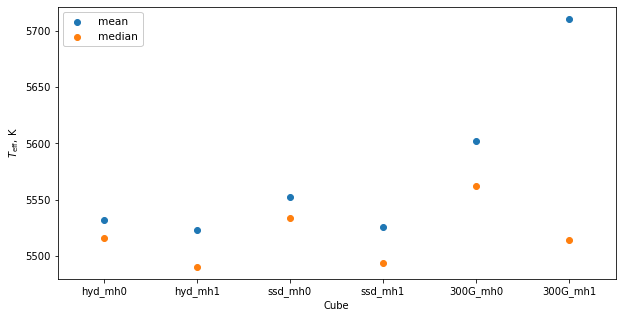

In [48]:
import matplotlib.pyplot as plt

from matplotlib.ticker import FixedLocator

mean_val = [T0m0_mean, T0m1_mean, TSm0_mean, TSm1_mean, T3m0_mean, T3m1_mean]
medi_val = [T0m0_medi, T0m1_medi, TSm0_medi, TSm1_medi, T3m0_medi, T3m1_medi]

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (10, 5))

fig.canvas.draw()

ax.scatter(np.arange(len(mean_val)) + 1, mean_val, label = 'mean')
ax.scatter(np.arange(len(medi_val)) + 1, medi_val, label = 'median')

ax.set_xlabel(r'Cube')
ax.set_ylabel(r'$T_\mathrm{eff}$, K')

ax.set_xlim(0.5, 6.5)

ax.xaxis.set_major_locator(FixedLocator([1, 2, 3, 4, 5, 6]))

leg = ax.legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 10.5})

labels = ['hyd_mh0', 'hyd_mh1', 'ssd_mh0', 'ssd_mh1', '300G_mh0', '300G_mh1']

ax.set_xticklabels(labels)

plt.savefig('teff_mean_median.pdf', bbox_inches = 'tight')

plt.show()